Load the training data.

In [4]:
import pandas as pd
df_train = pd.read_csv('training_data.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   additives_n              1204 non-null   float64
 1   fat_100g                 1204 non-null   float64
 2   saturated-fat_100g       1204 non-null   float64
 3   carbohydrates_100g       1204 non-null   float64
 4   sugars_100g              1204 non-null   float64
 5   fiber_100g               1204 non-null   float64
 6   proteins_100g            1204 non-null   float64
 7   sodium_100g              1204 non-null   float64
 8   nutrition-score-uk_100g  1204 non-null   float64
 9   healthy_label            1204 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 94.2 KB


Separate the dependent variable y from the 'independent' variables x.

In [5]:
columns = df_train.columns
x_train = df_train[columns[:-1]]
y_train = df_train['healthy_label']

Split the data for training and validation

In [6]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(x_train, y_train, test_size=0.2, random_state=100)

Normalize the data

In [7]:
def normalize(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df
  
training_data_normalized = pd.DataFrame(normalize(training_data))

Build and fit the model

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(training_data_normalized, training_labels)

LogisticRegression()

Save and print the coefficients.

In [9]:
coefficients = model.coef_[0]
intercept = model.intercept_
print(coefficients)
print(intercept)

[-3.57656302  0.62696898  1.41128686 -2.4964741   2.1899741   3.26844782
  2.14304476 -2.8575396  -4.15406078]
[2.05175856]


Make a bar chart of the coefficients to easily visualize which features have the most impact on the classification.

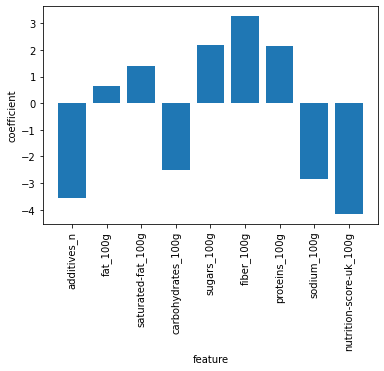

In [12]:
import matplotlib.pyplot as plt
bars = range(0, len(training_data_normalized.columns))
plt.bar(bars, coefficients)
plt.xticks(bars, training_data_normalized.columns, rotation=90)
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.show()

The nutrition-score seems to have the greatest impact on what is considered healthy. That makes sense. But all the variables play a significant part in the classification. Surprisingly, fat content is the least important of all these features.

Now we'll use the validation data to test the accuracy, recall, precision, and f1 of the model.

In [13]:
validation_data_normalized = pd.DataFrame(normalize(validation_data))
guesses = model.predict(validation_data_normalized)

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = validation_labels

accuracy = accuracy_score(labels, guesses)
print("accuracy = ", accuracy)
recall = recall_score(labels, guesses)
print("recall = ", recall)
precision = precision_score(labels, guesses)
print("precision = ", precision)
f_1 = f1_score(labels, guesses)
print("f_1 = ", f_1)

accuracy =  0.7302904564315352
recall =  0.7580645161290323
precision =  0.7286821705426356
f_1 =  0.7430830039525692


Not bad. Now we can test some foods. Let's load the rest of the skimmed dataset so we can use the data to predict whether certain foods are healthy or unhealthy.

In [20]:
df_whole = pd.read_csv('nutrition_data.tsv', sep='\t')

In [22]:
test_columns = ['product_name',] + list(training_data.columns)
df_test = df_whole[test_columns]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157158 entries, 0 to 157157
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             157158 non-null  object 
 1   additives_n              157158 non-null  float64
 2   fat_100g                 157158 non-null  float64
 3   saturated-fat_100g       157158 non-null  float64
 4   carbohydrates_100g       157158 non-null  float64
 5   sugars_100g              157158 non-null  float64
 6   fiber_100g               157158 non-null  float64
 7   proteins_100g            157158 non-null  float64
 8   sodium_100g              157158 non-null  float64
 9   nutrition-score-uk_100g  157158 non-null  float64
dtypes: float64(9), object(1)
memory usage: 12.0+ MB


In [44]:
def predict_a_food(df, food):
    try:
        test_rows = df[df['product_name'] == food]
        test_data = test_rows[training_data.columns]
        test_normalized = pd.DataFrame(normalize(test_data))
        guesses = model.predict(test_normalized)
        return guesses
    except:
        print("Sorry, we don't have enough information on this product to make a prediction.")
        return

In [45]:
predictions = predict_a_food(df_test, 'Pizza')
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 1 1 0 1 1 0 1 0 1]


In [46]:
import numpy as np
average_score = np.mean(np.array(predictions))
print("average =", average_score)

average = 0.3


In [52]:
predictions = predict_a_food(df_test, 'Asparagus')
print(predictions)
average_score = np.mean(np.array(predictions))
print("average =", average_score)

[1 1 0 0 1]
average = 0.6
